In [1]:
import pandas as pd
import pickle
import numpy as np
import datetime

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.decomposition import RandomizedPCA,PCA
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import svm
from sklearn.cross_validation import cross_val_score

import seaborn as sns
from seaborn import plt

%matplotlib inline

In [2]:
train = pd.DataFrame(pickle.load(open('/Volumes/flash/compology/image_data/train_gl_nn_data.pickle','r')))

In [3]:
test = pd.DataFrame(pickle.load(open('/Volumes/flash/compology/image_data/test_gl_nn_data.pickle','r')))

In [4]:
class ProcessTimer:
  def __init__(self):
    self.startTime = datetime.datetime.now()
  def start(self,functionResponse,name=""):
    endTime = datetime.datetime.now()
    self.delta = (endTime - self.startTime)
    print "{} Time |{}|".format(name,self.delta.seconds)
    return functionResponse

In [6]:
X_train = list(train['pixel_data'][:].values)
y_train = list(train['label'][:].values)

X_test = list(test['pixel_data'].values)
y_test = list(test['label'].values)
print len(X_train),len(X_test)

12087 5181


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1975125d0>]], dtype=object)

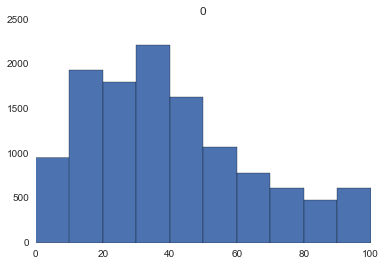

In [18]:
pd.DataFrame(y_train).hist(bins=10)

## Test for optimum number of components out of ~4k

In [7]:
pcaResults = {}
for n in [100,200,400,800,1600,3200,"all"]:    
    if n != "all":
        pca = PCA(n_components=n)
        Xtrain = ProcessTimer().start(pca.fit_transform(X_train),name="PCA "+ str(n))
        Xtest = pca.transform(X_test)
    else:
        Xtrain = X_train[:]
        Xtest = X_test[:]
    pcaResults[n] = {}
    
    lr = LogisticRegression(class_weight='auto')
    ProcessTimer().start(lr.fit(Xtrain,y_train),name="Log " + str(n))
    pcaResults[n]['score'] = lr.score(Xtest,y_test)
    print pcaResults[n]
    pcaResults[n]['explained_variance'] = pca.explained_variance_ratio_
    print
    

PCA 100 Time |123|
Log 100 Time |11|
{'score': 0.36865469986489097}

PCA 200 Time |124|
Log 200 Time |26|
{'score': 0.37791932059447986}

PCA 400 Time |120|
Log 400 Time |62|
{'score': 0.35726693688477129}

PCA 800 Time |114|
Log 800 Time |182|
{'score': 0.34491410924531946}

PCA 1600 Time |125|
Log 1600 Time |474|
{'score': 0.35109052306504535}

PCA 3200 Time |116|
Log 3200 Time |937|
{'score': 0.33835166956186064}

Log all Time |394|
{'score': 0.3464582127002509}



In [9]:
pcaResultsDTC = {}
for n in [100,200,400,800,1600,3200,"all"]:    
    if n != "all":
        pca = PCA(n_components=n)
        Xtrain = ProcessTimer().start(pca.fit_transform(X_train),name="PCA "+ str(n))
        Xtest = pca.transform(X_test)
    else:
        Xtrain = X_train[:]
        Xtest = X_test[:]
    pcaResultsDTC[n] = {}
    
    dtc = DecisionTreeClassifier(max_depth=5, random_state=1)#, class_weight='auto'
    ProcessTimer().start(dtc.fit(Xtrain,y_train),name="DTC " + str(n))
    pcaResultsDTC[n]['score'] = dtc.score(Xtest,y_test)
    print pcaResultsDTC[n]
    print
    

PCA 100 Time |121|
DTC 100 Time |1|
{'score': 0.28121984172939585}

PCA 200 Time |121|
DTC 200 Time |2|
{'score': 0.28662420382165604}

PCA 400 Time |121|
DTC 400 Time |4|
{'score': 0.28546612623045742}

PCA 800 Time |125|
DTC 800 Time |8|
{'score': 0.28237791932059447}

PCA 1600 Time |121|
DTC 1600 Time |16|
{'score': 0.28276394518432735}

PCA 3200 Time |119|
DTC 3200 Time |33|
{'score': 0.28276394518432735}

DTC all Time |29|
{'score': 0.27909669947886506}



## PCA explanations

In [13]:
pca = PCA(n_components=200)
Xtrain = pca.fit_transform(X_train)
Xtest = pca.transform(X_test)
    
lr = LogisticRegression(class_weight='auto')
lr.fit(Xtrain,y_train)
print "Best PCA score for log reg: {}".format(lr.score(Xtest,y_test))
print "Explained variance: {}".format(pca.explained_variance_ratio_.sum())
print
    

Best PCA score for log reg: 0.377919320594
Explained variance: 0.829067561279



0.829067561279


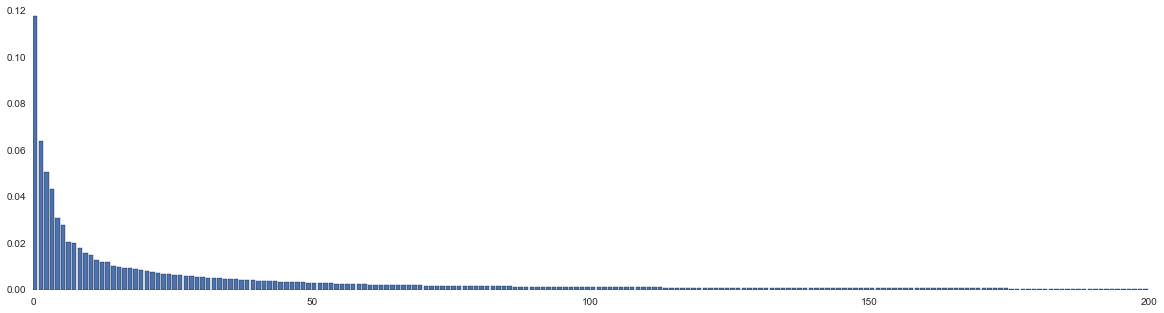

In [14]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.bar([x for x in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)
print pca.explained_variance_ratio_.sum()